# Autores
- Javier Abella
- Victor Teixidó
- Tomás Treviño
- You Wu

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

!pip install apafib --upgrade --user --quiet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import set_config
import warnings
set_config(display='text')
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 3)

# Datos muy desequilibrados

En los dominios médicos, los conjuntos de datos suelen tener un gran desequilibrio que dificulta la obtención de un modelo con buena precisión que realmente discrimine las clases que nos interesan. Vamos a trabajar con el conjunto de datos HCV del repositorio de conjuntos de datos de UCI que recopila medidas de muestras de sangre que corresponden a individuos sanos y pacientes con hepatitis C.

El objetivo de este problema es construir un clasificador que prediga si el ejemplo corresponde a una persona sana (*Blood_donor*) o si pertenece a alguna de las otras tres clases.


In [ ]:
hepatitis_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv')


hepatitis_data.rename({'Unnamed: 0': 'ID'}, axis = 1, inplace = True)
hepatitis_data.head()

,ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Apartado a

El primer paso es preprocesar y preparar los datos antes de ajustar cualquier modelo. Primero fusionaremos los ejemplos de todas las clases etiquetadas *BloodDonor* y trataremos los valores perdidos que existen en el conjunto de datos, imputandolos por la media. Además descartaremos cualquier atributo que no sea informativo. 


In [ ]:
hepatitis_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,615.0,NaN,NaN,NaN,308.0,177.679,1.0,154.5,308.0,461.5,615.0
Category,615,5,0=Blood Donor,533,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,615.0,NaN,NaN,NaN,47.408,10.055,19.0,39.0,47.0,54.0,77.0
Sex,615,2,m,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,614.0,NaN,NaN,NaN,41.62,5.781,14.9,38.8,41.95,45.2,82.2
ALP,597.0,NaN,NaN,NaN,68.284,26.028,11.3,52.5,66.2,80.1,416.6
ALT,614.0,NaN,NaN,NaN,28.451,25.47,0.9,16.4,23.0,33.075,325.3
AST,615.0,NaN,NaN,NaN,34.786,33.091,10.6,21.6,25.9,32.9,324.0
BIL,615.0,NaN,NaN,NaN,11.397,19.673,0.8,5.3,7.3,11.2,254.0
CHE,615.0,NaN,NaN,NaN,8.197,2.206,1.42,6.935,8.26,9.59,16.41


###Visualización de los datos

Primero vamos a visualizar el comportamiento de los datos tanto individualmente como relacionados con la variable objetivo en la búsqueda de posibles patrones o características destacables.

####Variables númericas

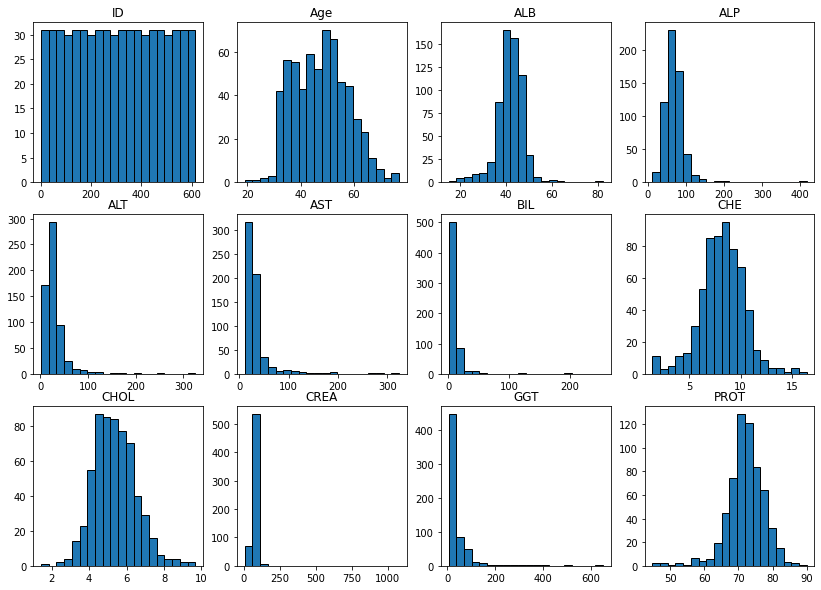

In [ ]:
fig,ax = plt.subplots(3,4,figsize=(14,10))

ax[0][0].hist(hepatitis_data['ID'], bins=20, edgecolor='black');
ax[0][0].set_title('ID');
ax[0][1].hist(hepatitis_data['Age'], bins=20, edgecolor='black');
ax[0][1].set_title('Age');
ax[0][2].hist(hepatitis_data['ALB'], bins=20, edgecolor='black');
ax[0][2].set_title('ALB');
ax[0][3].hist(hepatitis_data['ALP'], bins=20, edgecolor='black');
ax[0][3].set_title('ALP');

ax[1][0].hist(hepatitis_data['ALT'], bins=20, edgecolor='black');
ax[1][0].set_title('ALT');
ax[1][1].hist(hepatitis_data['AST'], bins=20, edgecolor='black');
ax[1][1].set_title('AST');
ax[1][2].hist(hepatitis_data['BIL'], bins=20, edgecolor='black');
ax[1][2].set_title('BIL');
ax[1][3].hist(hepatitis_data['CHE'], bins=20, edgecolor='black');
ax[1][3].set_title('CHE');

ax[2][0].hist(hepatitis_data['CHOL'], bins=20, edgecolor='black');
ax[2][0].set_title('CHOL');
ax[2][1].hist(hepatitis_data['CREA'], bins=20, edgecolor='black');
ax[2][1].set_title('CREA');
ax[2][2].hist(hepatitis_data['GGT'], bins=20, edgecolor='black');
ax[2][2].set_title('GGT');
ax[2][3].hist(hepatitis_data['PROT'], bins=20, edgecolor='black');
ax[2][3].set_title('PROT');

Como podemos ver la variable *ID* no nos proporciona información útil asi que la eliminaremos del conjunto de datos durante el preprocessing.

Vamos a representar los diferentes boxplots de las variables númericas acorde a cada una de las clases de nuestra variable objetivo.

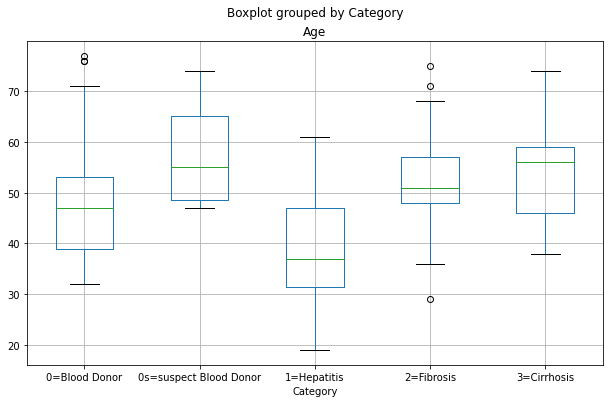

In [ ]:
hepatitis_data.boxplot(column = 'Age', by ='Category',figsize = (10,6));

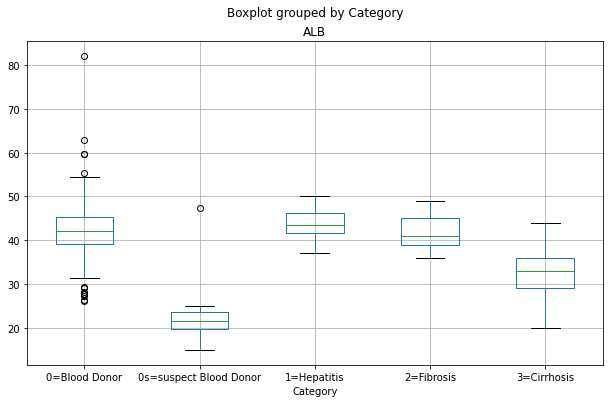

In [ ]:
hepatitis_data.boxplot(column = 'ALB', by ='Category',figsize = (10,6));

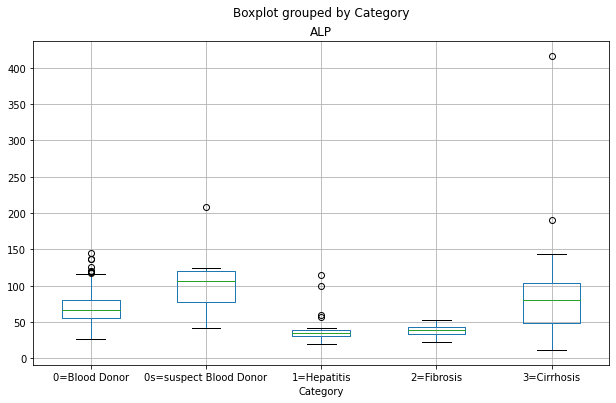

In [ ]:
hepatitis_data.boxplot(column = 'ALP', by ='Category',figsize = (10,6));

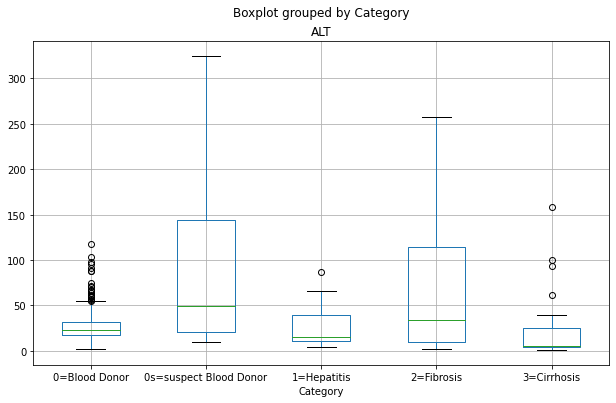

In [ ]:
hepatitis_data.boxplot(column = 'ALT', by ='Category',figsize = (10,6));

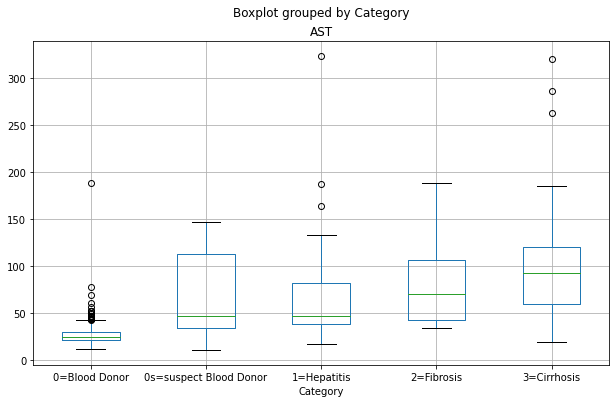

In [ ]:
hepatitis_data.boxplot(column = 'AST', by ='Category',figsize = (10,6));

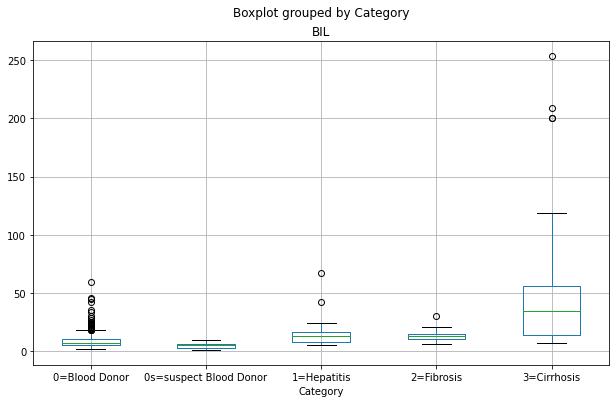

In [ ]:
hepatitis_data.boxplot(column = 'BIL', by ='Category',figsize = (10,6));

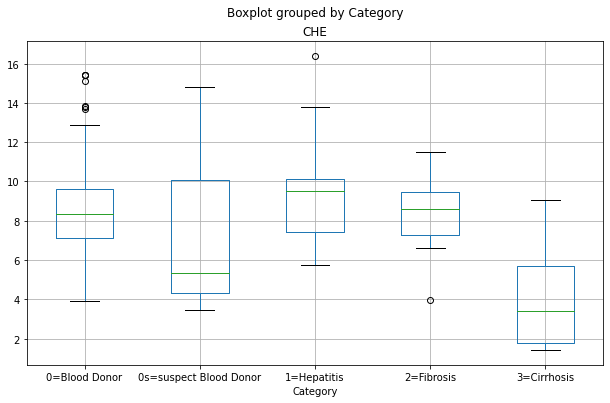

In [ ]:
hepatitis_data.boxplot(column = 'CHE', by ='Category',figsize = (10,6));

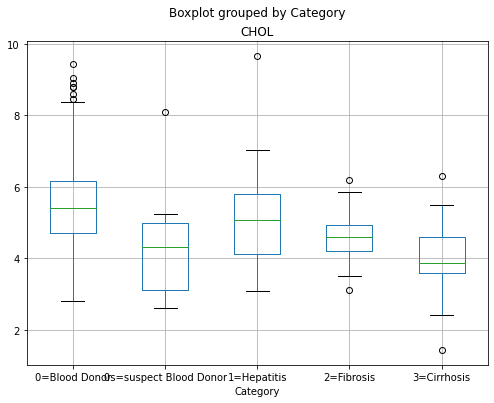

In [ ]:
hepatitis_data.boxplot(column = 'CHOL', by ='Category',figsize = (8,6));

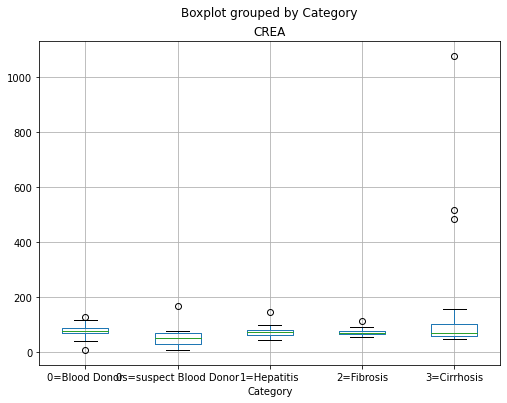

In [ ]:
hepatitis_data.boxplot(column = 'CREA', by ='Category',figsize = (8,6));

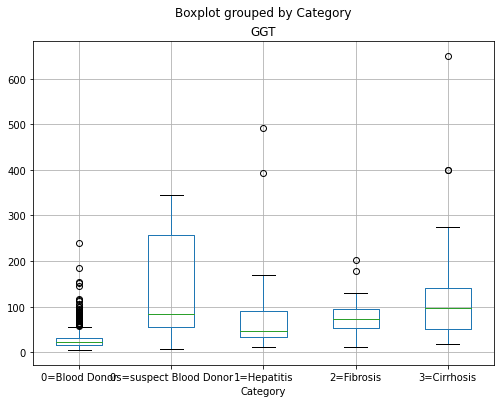

In [ ]:
hepatitis_data.boxplot(column = 'GGT', by ='Category',figsize = (8,6));

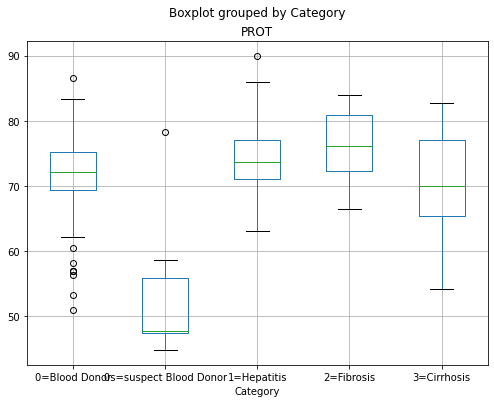

In [ ]:
hepatitis_data.boxplot(column = 'PROT', by ='Category',figsize = (8,6));

In [ ]:
# Creamos una copia que no tenga lost_values
hepatitis_copy = hepatitis_data.dropna()

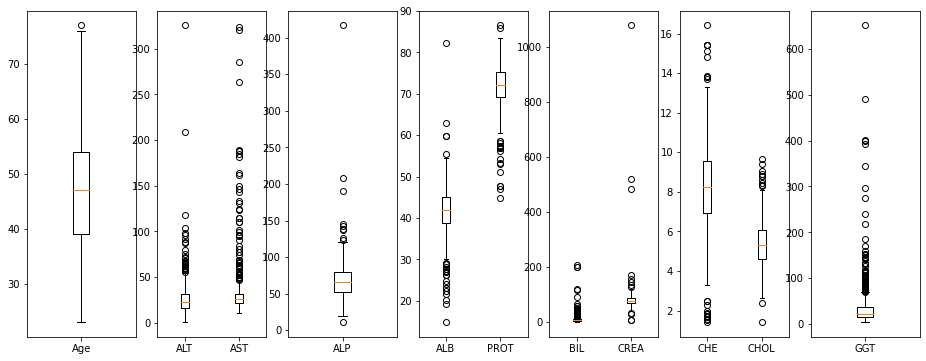

In [ ]:
fig, ax = plt.subplots(1,7,figsize=(16,6))

boxplot_data = [hepatitis_copy['Age']]
ax[0].boxplot(boxplot_data, labels=['Age']);

boxplot_data = [hepatitis_copy['ALT'],hepatitis_copy['AST']]
ax[1].boxplot(boxplot_data, labels = ['ALT', 'AST']);

boxplot_data = [hepatitis_copy['ALP']]
ax[2].boxplot(boxplot_data, labels=['ALP']);

boxplot_data = [hepatitis_copy['ALB'],hepatitis_copy['PROT']]
ax[3].boxplot(boxplot_data, labels = ['ALB', 'PROT']);

boxplot_data = [hepatitis_copy['BIL'],hepatitis_copy['CREA']]
ax[4].boxplot(boxplot_data, labels=['BIL','CREA']);

boxplot_data = [hepatitis_copy['CHE'],hepatitis_copy['CHOL']]
ax[5].boxplot(boxplot_data, labels=['CHE','CHOL']);

boxplot_data = [hepatitis_copy['GGT']]
ax[6].boxplot(boxplot_data, labels=['GGT']);

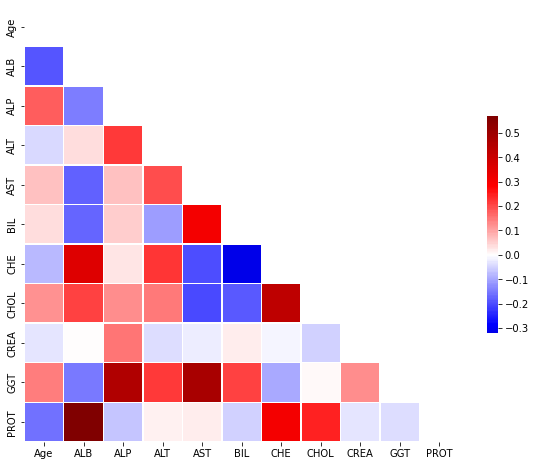

In [ ]:
hepatitis_x = hepatitis_copy.drop(columns = ['Category', 'Sex', 'ID'])
hepatitis_y = hepatitis_copy['Category']

hepatitis_frame = pd.DataFrame(hepatitis_x)

corr = hepatitis_frame.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

En esta matriz podemos ver la correlación entre las variabels numéricas del conujunto de datos podemos ver por ejemplo la alta correlación entre ALB y PROT.

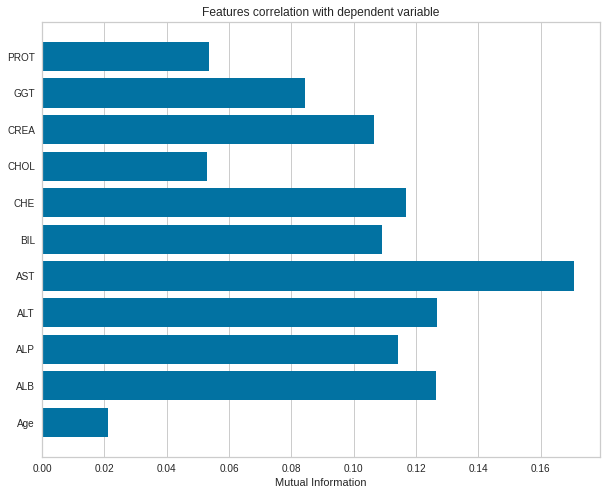

In [ ]:
from yellowbrick.target.feature_correlation import feature_correlation

plt.figure(figsize=(10,8))
visualizer = feature_correlation(hepatitis_frame, hepatitis_y, labels=list(hepatitis_frame.columns), method='mutual_info-classification');

Podemos ver en la gráfica que la variable con más correlacion seria la AST (una encima que se encuentra en los músculos pero abunda en el hígado) con un 0.175 y la que menos correlación tendría sería la edad *Age* con menos de un 0.025.

####Variables categóricas



m    377
f    238
Name: Sex, dtype: int64


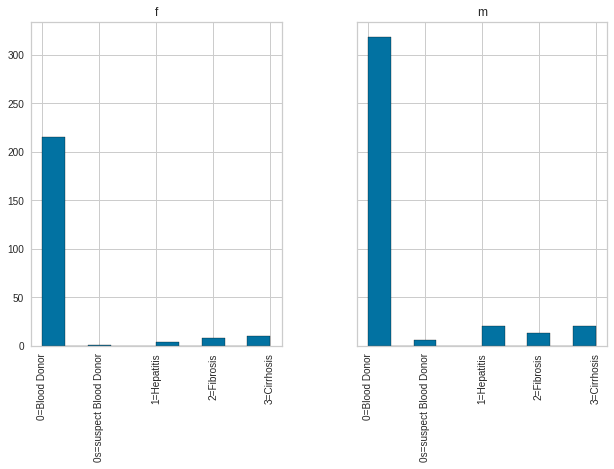

In [ ]:
print(hepatitis_data['Sex'].value_counts())

hepatitis_data.hist(column='Category',by='Sex',bins=10, sharey=True, figsize=(10,6), edgecolor='black');

En los datos podemos apreciar que hay más hombres que mujeres en los datos (139 más) y por lo tanto hay más representación en todas las clases por parte de los hombres que de las mujeres.

####División de los datos

Dividimos los datos en conjunto de entrenamiento y test (70%/30%).

In [ ]:
from sklearn.model_selection import train_test_split

X = hepatitis_data.loc[:, hepatitis_data.columns != 'Category']
y = hepatitis_data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=33)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(430, 13) (430,)
(185, 13) (185,)


###Preprocessing

Durante el preprocessing vamos a eliminar la variable *ID* ya que no es útil a la hora de ajustar los modelos. Además modificaremos las clases de la variable objetivo para una mayor claridad.

También imputaremos por la media los posibles valores perdidos que puedan existir en nuestro conjunto de datos.

In [ ]:
def minimum_preprocessing(X,y):
  y.replace(['0s=suspect Blood Donor'], ['Blood_donor'], inplace=True)
  y.replace(['0=Blood Donor'], ['Blood_donor'], inplace=True)
  y.replace(['1=Hepatitis'], ['Hepatitis'], inplace=True)
  y.replace(['2=Fibrosis'], ['Fibrosis'], inplace=True)
  y.replace(['3=Cirrhosis'], ['Cirrhosis'], inplace=True)

  print('Tamaño original:{}'.format(X.shape))

  #one-hot encoding Sex variable 
  sex_dummies = pd.get_dummies(X['Sex'], prefix = 'Sex', drop_first = True)
  X = pd.concat([X,sex_dummies], axis = 1)

  #remove ID column
  X.drop(columns = ['ID'],inplace = True)

  #remove categorical variable (Sex)
  X.drop(columns = ['Sex'],inplace = True)

  # replace missing values for the meaning of its attribute
  X = X.fillna(X.mean())
  print('Nuevo tamaño:{}'.format(X.shape))

  #checking that no missing numbers are left
  X.dropna()
  print('Comprobacion:{}'.format(X.shape))
  return X, y

Aplicamos el preprocessing especificado tanto al conjunto de entrenamiento como al conjunto de test.

In [ ]:
X_train, y_train = minimum_preprocessing(X_train,y_train)
print()
X_test, y_test = minimum_preprocessing(X_test,y_test)

Tamaño original:(430, 13)
Nuevo tamaño:(430, 12)
Comprobacion:(430, 12)

Tamaño original:(185, 13)
Nuevo tamaño:(185, 12)
Comprobacion:(185, 12)


El último paso para dejar los conjuntos de datos listos para el ajuste de los distintos modelos, es la estandarización de los datos.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [ ]:
X_train.head()
y_train.value_counts()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_m
322,-1.407,-1.113,0.506,-0.582,-0.353,-0.356,0.151,-0.126,-0.514,-0.509,-1.166,-1.249
199,0.309,-1.113,-0.818,-0.059,-0.131,-0.240,-0.360,0.313,-0.476,0.574,-0.329,0.801
417,-0.095,-0.965,2.289,0.178,-0.264,-0.388,0.607,-0.512,-0.055,-0.364,0.090,-1.249
8,-1.508,1.636,-0.094,-0.193,-0.378,-0.218,0.188,-1.166,0.136,-0.496,-0.176,0.801
352,-1.104,0.806,0.086,-0.448,-0.280,-0.235,-0.821,0.196,-0.476,-0.394,0.623,-1.249


Blood_donor    384
Hepatitis       19
Cirrhosis       15
Fibrosis        12
Name: Category, dtype: int64

##Apartado b

Aplicad algún método de reducción de dimensionalidad a los datos de entrenamiento y comentad lo que se pueda apreciar en la visualización. Pensad en qué podéis representar sobre la transformación.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train);

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.19192275 0.17070398 0.11967068 0.09759168 0.07347882 0.07223104
 0.06183251 0.05782197 0.05390742 0.0394528  0.03244611 0.02894023]
[0.19192275 0.36262674 0.48229742 0.5798891  0.65336792 0.72559896
 0.78743148 0.84525344 0.89916087 0.93861366 0.97105977 1.        ]


Usando la varianza explicada, podemos ver como conservando 8 componentes obtenemos más del 0.8 de varianza acumulada. Este 0.8 es un estándard normalmente utilizado para cribar cuantas componentes utilizar. La razón por la que sean necesarias tantas componentes para alcanzar dicho valor, es la existencia de un gran número de distintos atributos que definen nuestro conjunto de datos.

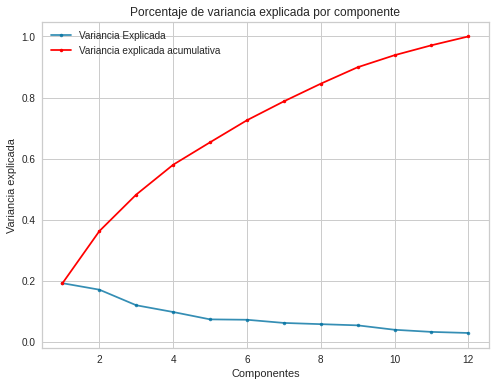

In [ ]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         pca.explained_variance_ratio_ , alpha=0.8, marker='.',
         label="Variancia Explicada");

y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');

plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red', marker='.',
         label="Variancia explicada acumulativa");
         
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

En estos gráficos vemos la varianza representada en función de las componentes utilizadas.

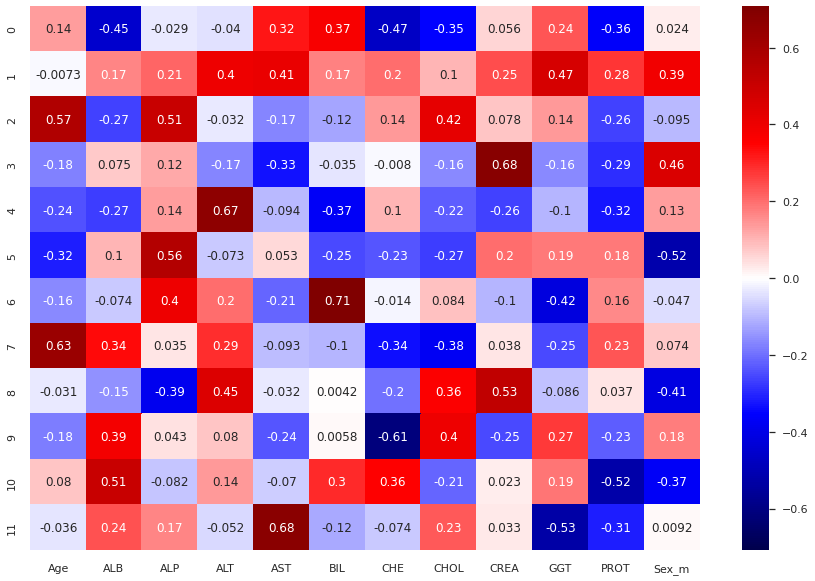

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(pca.components_, cmap='seismic',
            xticklabels=X_train.columns,
            vmin=-np.max(np.abs(pca.components_)),
            vmax=np.max(np.abs(pca.components_)),
            annot=True);

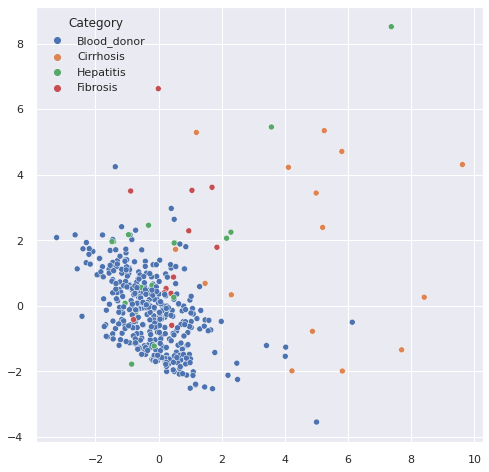

In [ ]:
X_trans = pca.transform(X_train)
plt.figure(figsize=(8,8));
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train);

Habiendo escogido 8 componentes, suena algo confuso intentar representar la disitrbución de los valores en unicamente dos dimensiones. En la gráfica podemos llegar a ver una cierta separación aunque claramente se ve una aglomeracion de "Blood Donor" , aún así, nos estamos perdiendo detalles dado que hay otras dimensiones que nos representamos.

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_train, x=X_trans[:,0], y=X_trans[:,1], z=X_trans[:,3], color=y_train)
fig.show();

Ahora podemos ver con algo más de claridad la distinción entre los rangos de la variable objetivo. A pesar de que hay más dimensiones que no estamos pudiendo representar podemos ver razonablemente bien los distintos valores. Aunque se puede seguir apreciando como hay una gran aglomeración de pertenecientes a la clase de Blood Donor y casi todos los demás están dispersados por el resto del espacio de representación.

## Apartado c

En este apartado vamos a utilizar el modelo de clasificación Naïve Bayes (Gaussiano).

Primero de todo hemos creado una función donde se guarda los resultados obtenidos de los modelos, en los cual son: *accuracy*, *precission*, *recall*, *f1-score* y la precisión individual para cada una de las clases.

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score

def save_results(clf, X_test, y_test, nclf, df, bd_acc, hep_acc, fib_acc, cir_acc):
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (W)'] = precision_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'recall score (W)'] = recall_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'f1 score (W)'] = f1_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'Blood_donor_acc'] = bd_acc
    df.loc[nclf,'Hepatitis_acc'] = hep_acc
    df.loc[nclf,'Fibrosis_acc'] = fib_acc
    df.loc[nclf,'Cirrhosis_acc'] = cir_acc
    return df

results_df = pd.DataFrame()

En este caso, dado que los datos son continuos podemos asumir que se distribuyen segun gausianas, por lo tanto, vamos a utilizar el método de clasificación Naive Bayes Gaussiano. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
print(np.mean(cross_val_score(gnb,X_train,y_train,cv=10)))

0.9093023255813953


Podemos ver que el modelo obtenido es bastante bueno, ya que el promedio de la validación cruzada alcanza un 90,9%.

In [ ]:
gnb_model = GaussianNB().fit(X_train, y_train)

print('Means:')
means =pd.DataFrame(gnb_model.theta_)
means.columns=X_train.columns

means

Means:


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_m
0,0.008,0.060,0.068,-0.055,-0.225,-0.127,0.053,0.078,-0.028,-0.159,-0.042,-0.037
1,0.786,-1.691,0.078,-0.133,2.636,2.817,-2.016,-1.239,1.108,1.714,-0.384,0.254
2,0.317,-0.206,-0.644,2.033,1.483,0.102,0.197,-0.545,-0.221,0.800,1.120,-0.053
3,-0.977,0.246,-1.021,-0.063,1.530,0.275,0.387,-0.256,-0.179,1.360,0.438,0.585


In [ ]:
print(classification_report(gnb_model.predict(X_test), y_test,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))

              precision    recall  f1-score   support

 Blood_donor       0.92      0.96      0.94       150
   Hepatitis       0.80      0.75      0.77        16
    Fibrosis       0.44      0.36      0.40        11
   Cirrhosis       0.20      0.12      0.15         8

    accuracy                           0.87       185
   macro avg       0.59      0.55      0.57       185
weighted avg       0.85      0.87      0.86       185



Podemos ver el acierto del modelo es coherente con el que hemos obtenido con la validación cruzada.

La clase Blood_donor se obtiene resultados satifactible, en el que tiene una precisión de 92%, és decir, la mayoria de los individuos que se han clasificado como Blood_donor es realmente de esta clase. Y todos los individuos que pertenencen en la esta clase el 96% se han clasificado correctamente.

En el caso de Hepatitis,los resultados obtenidos son bastante buenos,todo y que no son tan buenos como sería el caso de Blood_donor. Tiene una precisión de 80% y todos los individuos que pertenencen en la esta clase el 75% se han clasificado correctamente.

En otros dos casos los son satisfactibles ya que ninguno de los dos supera ni la 50%. Y eso puede ser causado por el número de ocurrencias reales de la clase(support) en el conjunto de datos especificado, En este caso es desequilibrado, que eso indica debilidades estructurales en los puntajes informados del clasificador.

También podemos observar que la media de los resultados de todas las clases son similares igual que el weighted average pondera respecto a la proporción de cada clase.

In [ ]:
results_df = save_results(gnb_model, X_test, y_test, 'GNB', results_df, 0.94, 0.77, 0.40, 0.15)

 A parte del informe de clasificación podemos ver también en la matriz de confusión que errores se cometen.

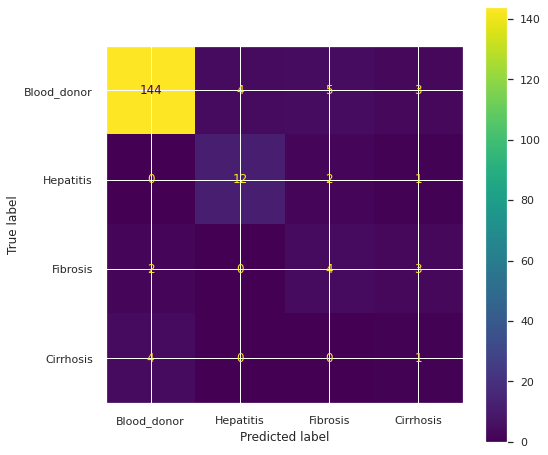

In [ ]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(gnb_model, X_test,y_test, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

Tal y como hemos visto en el informe de clasificación, los individuos de las clases Fibrosis y Cirrhosis son las que más se clasifican de manera más confusos respecto las dos otras clases. Que ese puede ser causado por la pequeña cantidad de instancias que existen de cada clase.


El AUC proporciona una medida agregada del rendimiento en todos los umbrales de clasificación posibles. Podemos entender este valor como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

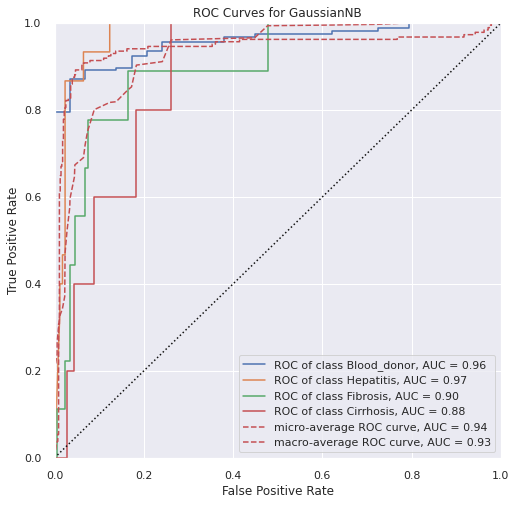

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc

plt.figure(figsize=(8,8));
roc_auc(gnb_model, X_train, y_train, X_test, y_test, classes=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']);

## Apartado d

Vamos a ajustar un discriminante lineal (LDA) y una regresión logística a los datos.


### LDA

El primer modelo que ajustaremos será un discriminante lineal (LDA).

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda,X_train,y_train,cv=10)))

0.9348837209302324


El acierto medio del modelo que hemos obtenido es bastante bueno (93.488%).

En *Linear Discriminant Analysis* no tenemos hiperparámetros que explorar, por tanto ajustaremos el modelo con todos los datos del conjunto de entrenamiento para ver que valores obtenemos. Una vez tengamos estos resultados, probaremos el modelo creado con el conjunto de test. 

Coefs:


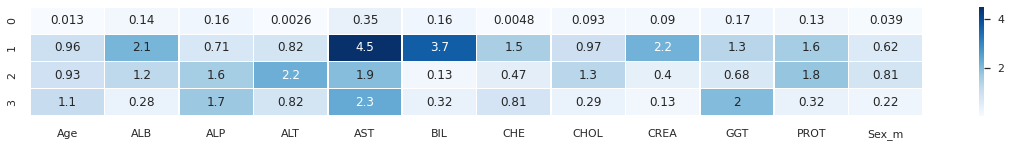

In [ ]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

print('Coefs:')
coefs = pd.DataFrame(lda_model.coef_)
coefs.columns = X_train.columns

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(), annot=True, linewidths=.5, cbar=True, xticklabels=True, cmap='Blues', annot_kws={'size':12});

Esta matriz de coeficientes nos indica, para cada variable y clase, lo siguiente. Por cada aumento en una unidad en una de las variables, la clase incremente por el valor del coeficiente, mientras las otras variables se mantienen contstantes.

In [ ]:
print(classification_report(lda_model.predict(X_test), y_test,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))

              precision    recall  f1-score   support

 Blood_donor       0.97      0.95      0.96       160
   Hepatitis       0.73      1.00      0.85        11
    Fibrosis       0.33      0.43      0.38         7
   Cirrhosis       0.20      0.14      0.17         7

    accuracy                           0.90       185
   macro avg       0.56      0.63      0.59       185
weighted avg       0.91      0.90      0.90       185



Por un lado, de entre todas las instancias clasificadas como *Blood donor* realmente el 0.97 de estas pertenecían a dicha clase, prácticamente todas. De todos los individuos que si formaban parte de la clase *Blood donor*, nuestro modelo ha sido capaz de identificar un 0.95 de estos.

Por otro lado, de entre todas las instancias clasificadas como *Hepatitis* realmente el 0.73 de estas pertenecían a dicha clase. Nuestro modelo ha sido capaz de identificar a todos los individuos que formaban parte de esta clase.

Las últimas dos clases, *Fibrosis* y *Cirrhosis*, son las que peores resultados han obtenido. Podemos ver que la mayoría de elementos que pertenecen a dichas clases no son identificados correctamente.

Por tanto, a pesar de tener un acierto general del 90%, tenemos que tener en cuenta que esto no significa que sepamos predecir por igual todas las clases, porque como se ve claramente, esto no es así.

In [ ]:
results_df = save_results(lda_model, X_test, y_test, 'LDA', results_df, 0.96, 0.85, 0.38, 0.17)

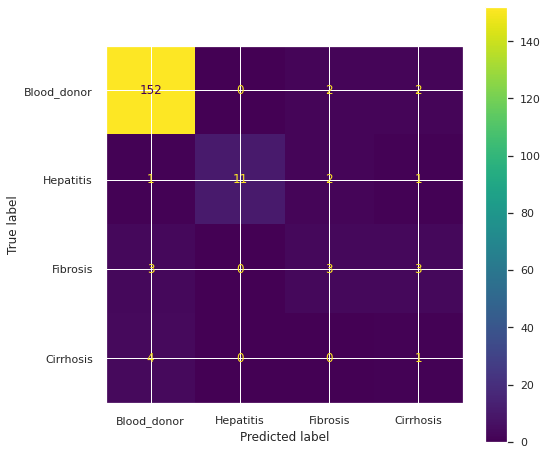

In [ ]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lda_model, X_test,y_test, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

Tal y como veíamos antes, los individuos de las clases *Fibrosis* y *Cirrhosis* son las que más se confunden con otras clases. Probablemente debido a la pequeña cantidad de instancias que existen de cada clase.

El AUC proporciona una medida agregada del rendimiento en todos los umbrales de clasificación posibles. Podemos entender este valor como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

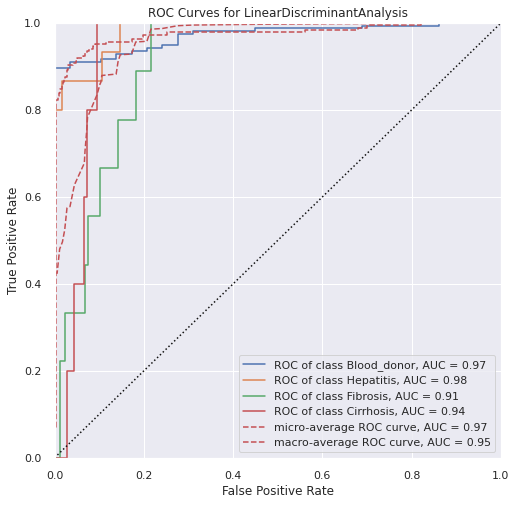

In [ ]:
plt.figure(figsize=(8,8));
roc_auc(lda_model, X_train, y_train, X_test, y_test, classes=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']);

### Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
print(np.mean(cross_val_score(lr,X_train,y_train,cv=10)))

0.9372093023255813


El acierto medio del modelo que hemos obtenido es bastante bueno (93.72%). De hecho es prácticamente idéntico al obtenido con LDA.

En *Regresión Logística* si tenemos de hiperparámetros que exploraremos para utilizar los que mejores resultados nos proporcionen. Una vez tengamos estos hiperparámetros, los aplicaremos a nuestro modelo y veremos que porcentaje de acierto obtenemos con el conjunto de test. 

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train, y_train);

In [ ]:
show_html(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
29,"{'C': 15.848931924611142, 'penalty': 'l2'}",0.942,1
19,"{'C': 0.501187233627272, 'penalty': 'l2'}",0.942,1
23,"{'C': 1.9952623149688788, 'penalty': 'l2'}",0.940,3
31,"{'C': 31.622776601683793, 'penalty': 'l2'}",0.940,3
25,"{'C': 3.981071705534969, 'penalty': 'l2'}",0.940,3


Podemos ver como usando l2 como *penalty* y escogiendo un valor de *C* igual a 15.85 o 0.5, aproximadamente, es cuando obtenemos los mejores resultados (acierto del 94.2%).

Coefs:


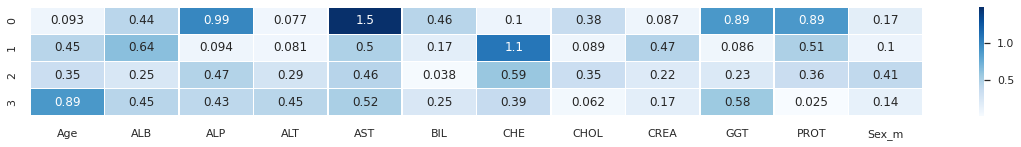

In [ ]:
print('Coefs:')
coefs = pd.DataFrame(lr_gs.best_estimator_.coef_)
coefs.columns = X_train.columns

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.5, cbar=True, xticklabels=True, cmap='Blues', annot_kws={'size':12});

Esta matriz de coeficientes nos indica, para cada variable y clase, lo siguiente. Por cada aumento en una unidad en una de las variables, la clase incremente por el valor del coeficiente, mientras las otras variables se mantienen constantes.

In [ ]:
print(classification_report(lr_gs.predict(X_test), y_test,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))

              precision    recall  f1-score   support

 Blood_donor       0.98      0.93      0.96       164
   Hepatitis       0.73      0.92      0.81        12
    Fibrosis       0.33      0.60      0.43         5
   Cirrhosis       0.00      0.00      0.00         4

    accuracy                           0.90       185
   macro avg       0.51      0.61      0.55       185
weighted avg       0.93      0.90      0.91       185



Parecido a como nos pasaba con *LDA*, tenemos buenos ratios de acierto para las dos primeras clases, somos capaces de identificar la mayoría de individuos que peretenecen a dichas clases.

Por otro lado, podemos ver como nuestro acierto respecto a la clase *Fibrosis* ha mejorado, en comparación a *LDA*, pero a coste de no empeorar drásticamente nuestros aciertos sobre la clase *Cirrhosis*.

Por tanto, a pesar de tener un acierto del 90%, esto no quiere decir que nuestro modelo sea tan bueno. Intento predecir valores que pertenezcan a las dos últimas clases, obtendremos valores no muy buenos.

In [ ]:
results_df = save_results(lr_gs, X_test, y_test, 'Logistic', results_df, 0.96, 0.81, 0.43, 0.00)

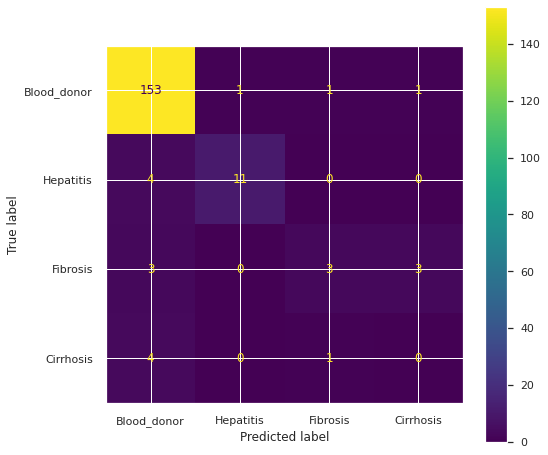

In [ ]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lr_gs, X_test,y_test, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

Tal y como comentábamos antes, ningún individuo de la clase *Cirrhosis* ha sido identificado correctamente. En cambio para las dos primeras clases, vemos resultados bastante buenos.

El AUC proporciona una medida agregada del rendimiento en todos los umbrales de clasificación posibles. Podemos entender este valor como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

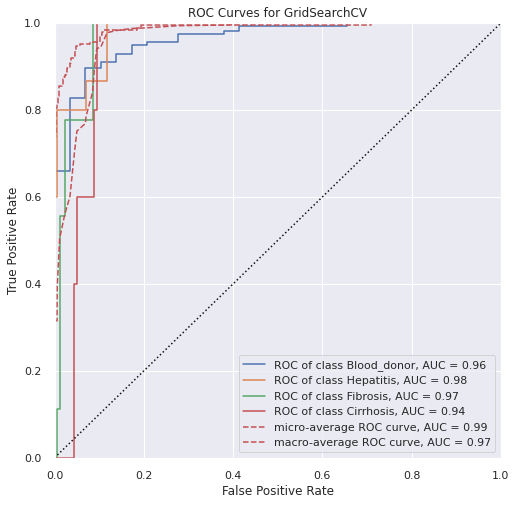

In [ ]:
plt.figure(figsize=(8,8));
roc_auc(lr_gs, X_train, y_train, X_test, y_test, classes=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']);

### Conclusión

Vamos a comparar ahora los 3 modelos que hemos entrado y sus desempeños en cuanto a precisión sobre el conjunto de datos de tipo test. 

In [ ]:
results_df.sort_values(by=['test acc'], ascending=False)

,test acc,precision score (W),recall score (W),f1 score (W),Blood_donor_acc,Hepatitis_acc,Fibrosis_acc,Cirrhosis_acc
LDA,0.903,0.907,0.903,0.903,0.96,0.85,0.38,0.17
Logistic,0.903,0.890,0.903,0.893,0.96,0.81,0.43,0.00
GNB,0.870,0.891,0.870,0.880,0.94,0.77,0.40,0.15


Como podemos ver, respecto al porcentaje de acierto general, los modelos basados en *LDA* y en *Regresión logística* son los que mejores resultados acaban dando sonbre el conjunto test de nuestros datos.

Aún así, entre estos dos sería lo más correcto destacar el segundo modelo debido a que, como podemos ver en la tabla de arriba, tiene una predicción pésima de la clase *Cirrhosis*. Los modelos basados en *LDA* y *Naive Bayes* tienen aciertos muy similires sobre las clases minoritarias, aciertos por cierto no muy buenos en algunas de las clases.

Es por estas justificaciones, que si tuvieramos que elegir un modelo como el modelo a utilizar, nos quedaríamos con el modelo ajustado con Linear Discriminant Analysis.

## Apartado e

La minimización de riesgos vecinales (Vicinal Risk Minimization) es un enfoque alternativo a la minimización del riesgo (en clase hablamos sobre la minimización empírica del riesgo) que establece que podemos abordar el aprendizaje utilizando una estimación de la densidad alrededor de los ejemplos. Esto puede verse como una técnica de aumento de dato (básicamente inventamos datos). Suponiendo que la densidad alrededor de un ejemplo es gaussiana, podemos añadir nuevos ejemplos a nuestro conjunto de datos agregándoles ruido gaussiano.


- Vamos a muestrear los datos de entrenamiento con reemplazo 500 y 1000 ejemplos de las tres clases minoritarias y agregaremos a cada uno ruido gaussiano con varianza 0.1 y 0.01 (tendréis un total de cuatro conjuntos de datos).

- Ajustaremos un discriminante lineal (LDA) y una regresión logística a estos conjuntos de datos.

In [ ]:
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X, y, test_size = 0.3, random_state=33)
X_train_copy, y_train_copy = minimum_preprocessing(X_train_copy, y_train_copy)
X_test_copy, y_test_copy = minimum_preprocessing(X_test_copy, y_test_copy)


data_preprocessed = X_train_copy.merge(y_train_copy,left_index=True, right_index=True);

Tamaño original:(430, 13)
Nuevo tamaño:(430, 12)
Comprobacion:(430, 12)
Tamaño original:(185, 13)
Nuevo tamaño:(185, 12)
Comprobacion:(185, 12)


En primer lugar volvemos a empezar desde el proceso de preprocessing y conseguimos la tabla entera preprocesada.

In [ ]:
from jax import random

def resample_with_gaussian_noise(df, target_size, variance, key):
  for cat in ["Hepatitis", "Fibrosis", "Cirrhosis"]:
    df_cat = df[df['Category'] == cat]
    df_cat = add_rows(df_cat, target_size, variance, key)
    df = df.append(df_cat, ignore_index=True)
  df.drop_duplicates(inplace=True)
  return df

def add_rows(df_cat, target_size, variance, key):
  number_of_new_rows = target_size - df_cat.shape[0]
  zeros = np.zeros((df_cat.shape[0], 10))
  noises_array = np.asarray((random.normal(key, (number_of_new_rows, 10)) * variance))
  noises_array = np.concatenate((zeros, noises_array), axis=0)
  noises = pd.DataFrame(noises_array, columns=df_cat.columns[1:-2])
  df_cat = pd.concat([df_cat]*int(1 + target_size/df_cat.shape[0]))
  df_cat.reset_index(drop=True, inplace=True)
  df_cat = df_cat.iloc[:target_size,:]
  df_cat.iloc[:,1:-2] += noises
  df_cat.drop_duplicates(inplace=True)
  return df_cat

Definimos las funciones para poder hacer el upsampling añadiendo ruido gaussiano, la funcion cogerá como parámetros la tabla a la que se tiene que aplicar el upsample, el objetivo de ejemplos por clase minoritaria y la variancia que tendrá el ruido gaussiano que se le sume.

In [ ]:
key1, key2, key3, key4 = random.split(random.PRNGKey(0),4)
set_A = resample_with_gaussian_noise(data_preprocessed, 500, 0.1, key1)
X_set_A = set_A[set_A.columns[0:-1]]
y_set_A = set_A['Category']

set_B = resample_with_gaussian_noise(data_preprocessed, 500, 0.01, key2)
X_set_B = set_B[set_A.columns[0:-1]]
y_set_B = set_B['Category']

set_C = resample_with_gaussian_noise(data_preprocessed, 1000, 0.1, key3)
X_set_C = set_C[set_A.columns[0:-1]]
y_set_C = set_C['Category']

set_D = resample_with_gaussian_noise(data_preprocessed, 1000, 0.01, key4)
X_set_D = set_D[set_A.columns[0:-1]]
y_set_D = set_D['Category']

Aplicamos la función para obtener así los 4 conjuntos y lo dividimos en variables de entrada y variable objetivo

In [ ]:
lda_model_A = LinearDiscriminantAnalysis().fit(X_set_A, y_set_A)
lda_model_B = LinearDiscriminantAnalysis().fit(X_set_B, y_set_B)
lda_model_C = LinearDiscriminantAnalysis().fit(X_set_C, y_set_C)
lda_model_D = LinearDiscriminantAnalysis().fit(X_set_D, y_set_D)

En primer lugar aplicaremos el modelo LDA 

In [ ]:
print("Con el modelo LDA se obtienen los siguientes resultados\n\n")
print("Conjunto 500 - 0.1\n--------------------\n" , classification_report(lda_model_A.predict(X_test_copy), y_test_copy,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))
print("Conjunto 500 - 0.01\n--------------------\n" , classification_report(lda_model_B.predict(X_test_copy), y_test_copy,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))
print("Conjunto 1000 - 0.1\n--------------------\n" , classification_report(lda_model_C.predict(X_test_copy), y_test_copy,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))
print("Conjunto 1000 - 0.01\n--------------------\n" , classification_report(lda_model_D.predict(X_test_copy), y_test_copy,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))

Con el modelo LDA se obtienen los siguientes resultados


Conjunto 500 - 0.1
--------------------
               precision    recall  f1-score   support

 Blood_donor       0.76      0.98      0.86       120
   Hepatitis       0.80      0.71      0.75        17
    Fibrosis       0.67      0.24      0.35        25
   Cirrhosis       0.60      0.13      0.21        23

    accuracy                           0.75       185
   macro avg       0.71      0.51      0.54       185
weighted avg       0.73      0.75      0.70       185

Conjunto 500 - 0.01
--------------------
               precision    recall  f1-score   support

 Blood_donor       0.76      0.98      0.86       120
   Hepatitis       0.80      0.71      0.75        17
    Fibrosis       0.67      0.24      0.35        25
   Cirrhosis       0.60      0.13      0.21        23

    accuracy                           0.75       185
   macro avg       0.71      0.51      0.54       185
weighted avg       0.73      0.75      0.70 

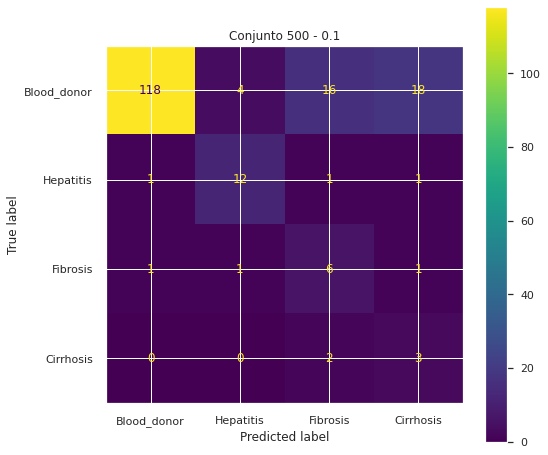

In [ ]:
plt.figure(figsize=(8,8));
plt.title("Conjunto 500 - 0.1")
ConfusionMatrixDisplay.from_estimator(lda_model_A, X_test_copy,y_test_copy, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

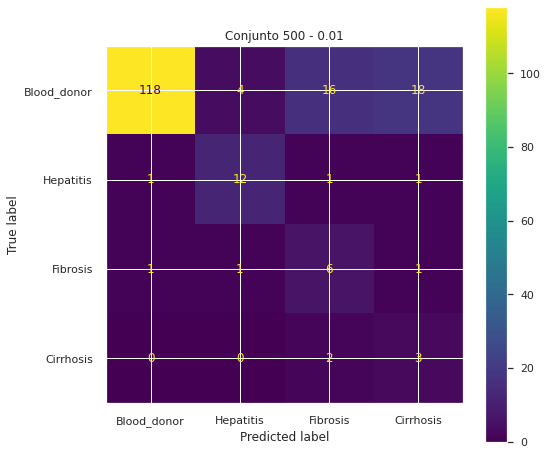

In [ ]:
plt.figure(figsize=(8,8));
plt.title("Conjunto 500 - 0.01")
ConfusionMatrixDisplay.from_estimator(lda_model_B, X_test_copy,y_test_copy, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

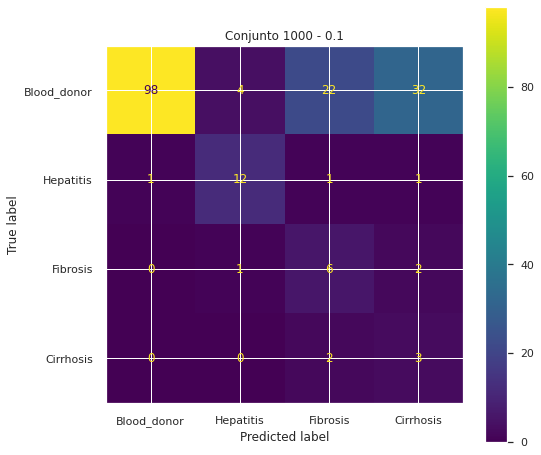

In [ ]:
plt.figure(figsize=(8,8));
plt.title("Conjunto 1000 - 0.1")
ConfusionMatrixDisplay.from_estimator(lda_model_C, X_test_copy,y_test_copy, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

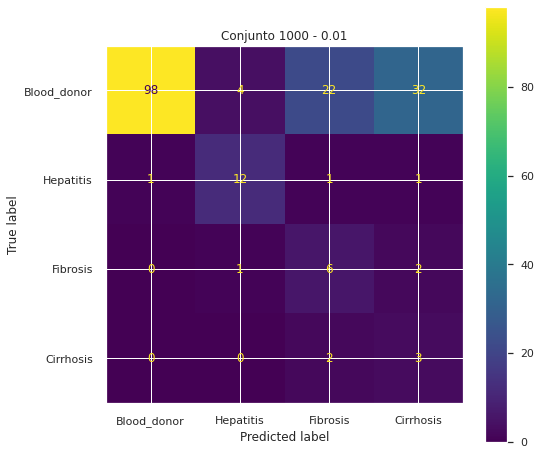

In [ ]:
plt.figure(figsize=(8,8));
plt.title("Conjunto 1000 - 0.01")
ConfusionMatrixDisplay.from_estimator(lda_model_D, X_test_copy,y_test_copy, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

En las matrices de confusión vemos muy claramente como, cuantos mñas ejemplos hay de las clases que originalmente eran minoritarias, mejor se predicen estas clases incluso en el conjunto de test, que sigue estando populado principalmente por ejemplos que pertenecen a la clase 0

In [ ]:
lr = LogisticRegression(max_iter=1000)
param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}

lr_gs_A =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs_A.fit(X_set_A, y_set_A);

lr_gs_B =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs_B.fit(X_set_C, y_set_C);

lr_gs_C =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs_C.fit(X_set_C, y_set_C);

lr_gs_D =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs_D.fit(X_set_D, y_set_D);

Ahora generamos los modelos de regresión lineal explorando los parametros para optimizar la precisión

In [ ]:
print("Con el modelo de regresión lineal se obtienen los siguientes resultados\n\n")
print("Conjunto 500 - 0.1\n--------------------\n" , classification_report(lr_gs_A.predict(X_test_copy), y_test_copy,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))
print("Conjunto 500 - 0.01\n--------------------\n" , classification_report(lr_gs_B.predict(X_test_copy), y_test_copy,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))
print("Conjunto 1000 - 0.1\n--------------------\n" , classification_report(lr_gs_C.predict(X_test_copy), y_test_copy,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))
print("Conjunto 1000 - 0.01\n--------------------\n" , classification_report(lr_gs_D.predict(X_test_copy), y_test_copy,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))

Con el modelo de regresión lineal se obtienen los siguientes resultados


Conjunto 500 - 0.1
--------------------
               precision    recall  f1-score   support

 Blood_donor       0.85      0.99      0.92       134
   Hepatitis       0.67      0.67      0.67        15
    Fibrosis       0.56      0.31      0.40        16
   Cirrhosis       0.60      0.15      0.24        20

    accuracy                           0.82       185
   macro avg       0.67      0.53      0.56       185
weighted avg       0.78      0.82      0.78       185

Conjunto 500 - 0.01
--------------------
               precision    recall  f1-score   support

 Blood_donor       0.81      0.99      0.89       128
   Hepatitis       0.67      0.59      0.62        17
    Fibrosis       0.56      0.29      0.38        17
   Cirrhosis       0.60      0.13      0.21        23

    accuracy                           0.78       185
   macro avg       0.66      0.50      0.53       185
weighted avg       0.75     

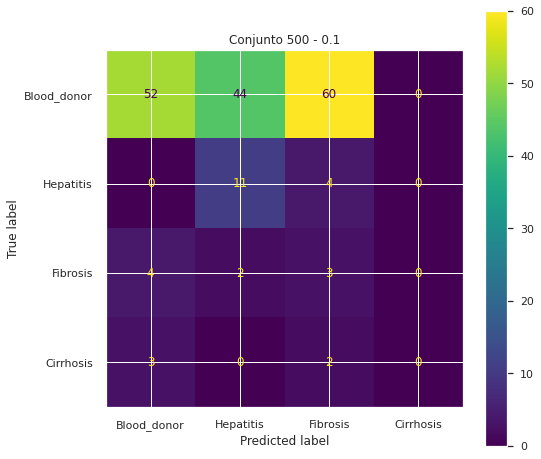

In [ ]:
plt.figure(figsize=(8,8));
plt.title("Conjunto 500 - 0.1")
ConfusionMatrixDisplay.from_estimator(lr_gs_A, X_test,y_test, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

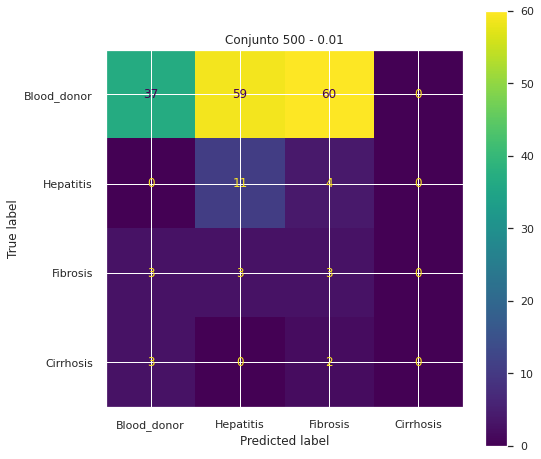

In [ ]:
plt.figure(figsize=(8,8));
plt.title("Conjunto 500 - 0.01")
ConfusionMatrixDisplay.from_estimator(lr_gs_B, X_test,y_test, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

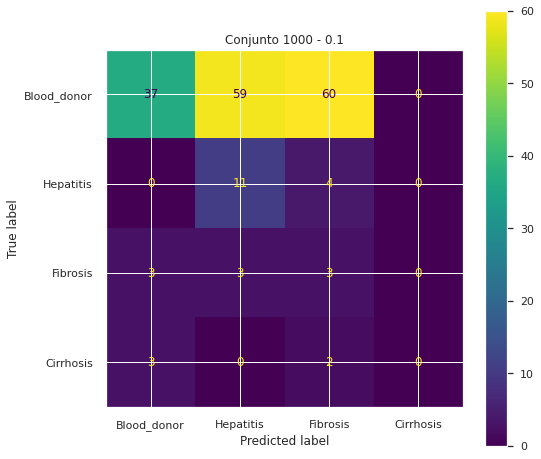

In [ ]:
plt.figure(figsize=(8,8));
plt.title("Conjunto 1000 - 0.1")
ConfusionMatrixDisplay.from_estimator(lr_gs_C, X_test,y_test, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

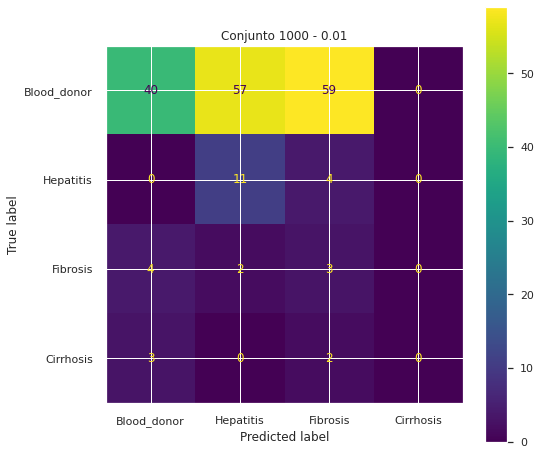

In [ ]:
plt.figure(figsize=(8,8));
plt.title("Conjunto 1000 - 0.01")
ConfusionMatrixDisplay.from_estimator(lr_gs_D, X_test,y_test, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

De nuevo vemos como, cuantos más ejemplos hay de las clases orginialmente minoritarias, más precisión tenemos para predecir éstas.

Como resumen de la aplicación de los dos modelos,  podemos decir que ha habido una mejora muy significativa de los resultados en cuanto a las clases minoritarias se refiere, y si se considera que es más importante predecir estas, ésta sería la opcón más útil para nuestro problema.

Esto se debe a que al haber más casos en los que las clases resultado son las originalmente minoritarias los modelos se ven inclinados a tenerlas mucho más en consideración para obtener una buena precisión global, dejan de ignorarlas básicamente como hacían previamente.

Otra observación importante es que realmente la variancia que aplicamos al ruido gaussiano que añadimos no afecta realmente los resultados, a pesar de tener dos conjuntos distintos con métricas ligeramente distinta obtenemos exactamente los mismos resultados de precisión.

## Apartado f

Una alternativa al aumento de datos para algunos clasificadores es asignar diferentes pesos a las clases o ejemplos. El modelo de regresión logística tiene un parámetro class_weight donde una de las opciones es balanced, utilizaremos esta opción para ponderar las clases según sus frecuencias.


In [ ]:
lr = LogisticRegression(max_iter=1000)

param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,21, endpoint=True), 'class_weight':['balanced']}
lr_weighted =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_weighted.fit(X_train, y_train);  

In [ ]:
show_html(pd.DataFrame(lr_weighted.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
1,"{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2'}",0.930,1
3,"{'C': 0.001995262314968879, 'class_weight': 'balanced', 'penalty': 'l2'}",0.926,2
5,"{'C': 0.003981071705534973, 'class_weight': 'balanced', 'penalty': 'l2'}",0.921,3
7,"{'C': 0.007943282347242814, 'class_weight': 'balanced', 'penalty': 'l2'}",0.919,4
11,"{'C': 0.03162277660168379, 'class_weight': 'balanced', 'penalty': 'l2'}",0.919,4


Podemos ver como usando l2 como *penalty* y escogiendo un valor de *C* igual a 0.001, es cuando obtenemos el mejor resultado (acierto del 93%).

Coefs:


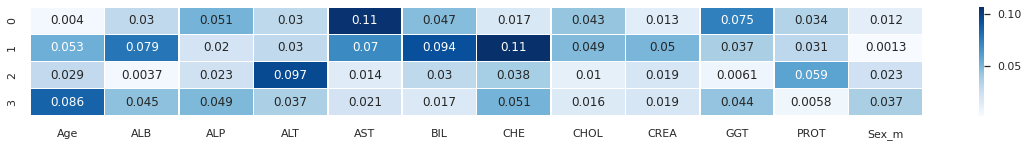

In [ ]:
print('Coefs:')
coefs = pd.DataFrame(lr_weighted.best_estimator_.coef_)
coefs.columns = X_train.columns

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.5, cbar=True, xticklabels=True, cmap='Blues', annot_kws={'size':12});

Esta matriz de coeficientes nos indica, para cada variable y clase, lo siguiente. Por cada aumento en una unidad en una de las variables, la clase incremente por el valor del coeficiente, mientras las otras variables se mantienen contstantes.

In [ ]:
print(classification_report(lr_weighted.predict(X_test), y_test,target_names=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']))

              precision    recall  f1-score   support

 Blood_donor       0.92      0.97      0.94       147
   Hepatitis       0.87      0.81      0.84        16
    Fibrosis       0.33      0.23      0.27        13
   Cirrhosis       0.40      0.22      0.29         9

    accuracy                           0.87       185
   macro avg       0.63      0.56      0.59       185
weighted avg       0.85      0.87      0.86       185



Parecido a como nos pasaba con los demás modelos, tenemos buenos ratios de acierto para las dos primeras clases, somos capaces de identificar la mayoría de individuos que peretenecen a dichas clases.

Por otro lado, podemos ver como nuestro acierto respecto a la clase *Cirrhosis* ha mejorado, en comparación a lo visto hasta ahora, esto es gracias a los nuevos pesos añadidos a la hora de entrenar el modelo. Aún así, esto deriva en un desempeño algo peor en el resto de clases.

Por tanto, a pesar de tener un acierto para las clases minoritarias algo mejor, el acierto global del modelo ha disminuido un poco.

In [ ]:
results_df = save_results(lr_weighted, X_test, y_test, 'Logistic with weights', results_df, 0.94, 0.84, 0.27, 0.29)

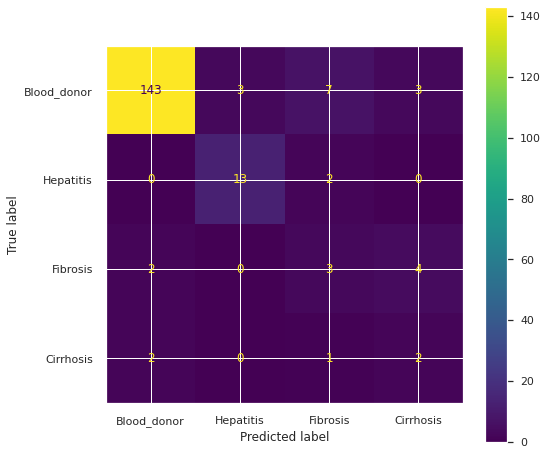

In [ ]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lr_weighted, X_test,y_test, display_labels=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis'], ax=plt.subplot());

Podemos ver como la confusión entre las clases minoritarias ha disminuido respecto a los otros modelos vistos en el notebook.

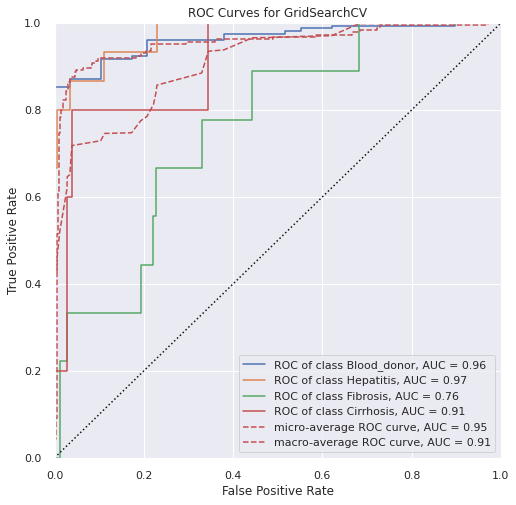

In [ ]:
plt.figure(figsize=(8,8));
roc_auc(lr_weighted, X_train, y_train, X_test, y_test, classes=['Blood_donor','Hepatitis','Fibrosis','Cirrhosis']);

EXPLICAR COSAS

In [ ]:
results_df.sort_values(by=['test acc'], ascending=False)

,test acc,precision score (W),recall score (W),f1 score (W),Blood_donor_acc,Hepatitis_acc,Fibrosis_acc,Cirrhosis_acc
LDA,0.903,0.907,0.903,0.903,0.96,0.85,0.38,0.17
Logistic,0.903,0.890,0.903,0.893,0.96,0.81,0.43,0.00
GNB,0.870,0.891,0.870,0.880,0.94,0.77,0.40,0.15
Logistic with weights,0.870,0.903,0.870,0.885,0.94,0.84,0.27,0.29


Vamos a comprar los resultados de este nuevo modelo con los vistos hasta el momento. Podemos ver como en los nuevos resultados, hemos obtenido un acierto relativamente mejor en las distintas clases. Esto es notorio sobretodo en la clase *Cirrhosis* donde, con este modelo, hemos obtenido el mejor de los resultados.

La contraparte de esto, es que hemos perdido algo de precisión en el resto de clases, ya que ahora tienen menos relevancia debido a los pesos dados. Es por esto, que el porcentaje de acierto general del modelo es algo peor a algunos de los vistos. Perder precisión en la clase *Blood_donor* deriva en un peor rendimiento del modelo, recordemos que las instancias de esta clase en el conjunto de datos son muy mayoritarias.